In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
test_folder = '/content/drive/MyDrive/Python_Colab/Data/test'
train_folder = '/content/drive/MyDrive/Python_Colab/Data/train'
val_folder = '/content/drive/MyDrive/Python_Colab/Data/valid'

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [7]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_folder,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

Found 315 files belonging to 4 classes.
Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [8]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# Model Zefnet
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model.build(input_shape=input_shape)


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (32, 125, 125, 96)        4800      
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 62, 62, 96)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (32, 31, 31, 256)         614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 15, 15, 256)         0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 50

Epoch 1/50
20/20 [==============================] - 11s 118ms/step - loss: 2.5112 - accuracy: 0.3002 - val_loss: 1.2597 - val_accuracy: 0.4444
Epoch 2/50
20/20 [==============================] - 2s 84ms/step - loss: 1.1298 - accuracy: 0.4666 - val_loss: 1.0092 - val_accuracy: 0.3889
Epoch 3/50
20/20 [==============================] - 2s 84ms/step - loss: 1.0088 - accuracy: 0.4959 - val_loss: 0.9372 - val_accuracy: 0.4861
Epoch 4/50
20/20 [==============================] - 2s 100ms/step - loss: 1.0457 - accuracy: 0.4698 - val_loss: 1.1509 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 2s 105ms/step - loss: 1.0069 - accuracy: 0.4845 - val_loss: 0.9781 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 2s 100ms/step - loss: 1.0110 - accuracy: 0.4763 - val_loss: 1.1002 - val_accuracy: 0.4306
Epoch 7/50
20/20 [==============================] - 2s 96ms/step - loss: 0.9998 - accuracy: 0.5024 - val_loss: 1.0691 - val_accuracy: 0.3472
Epoch 8/

In [ ]:
scores = model.evaluate(val_ds)

3/3 [==============================] - 0s 18ms/step - loss: 0.9535 - accuracy: 0.5972


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

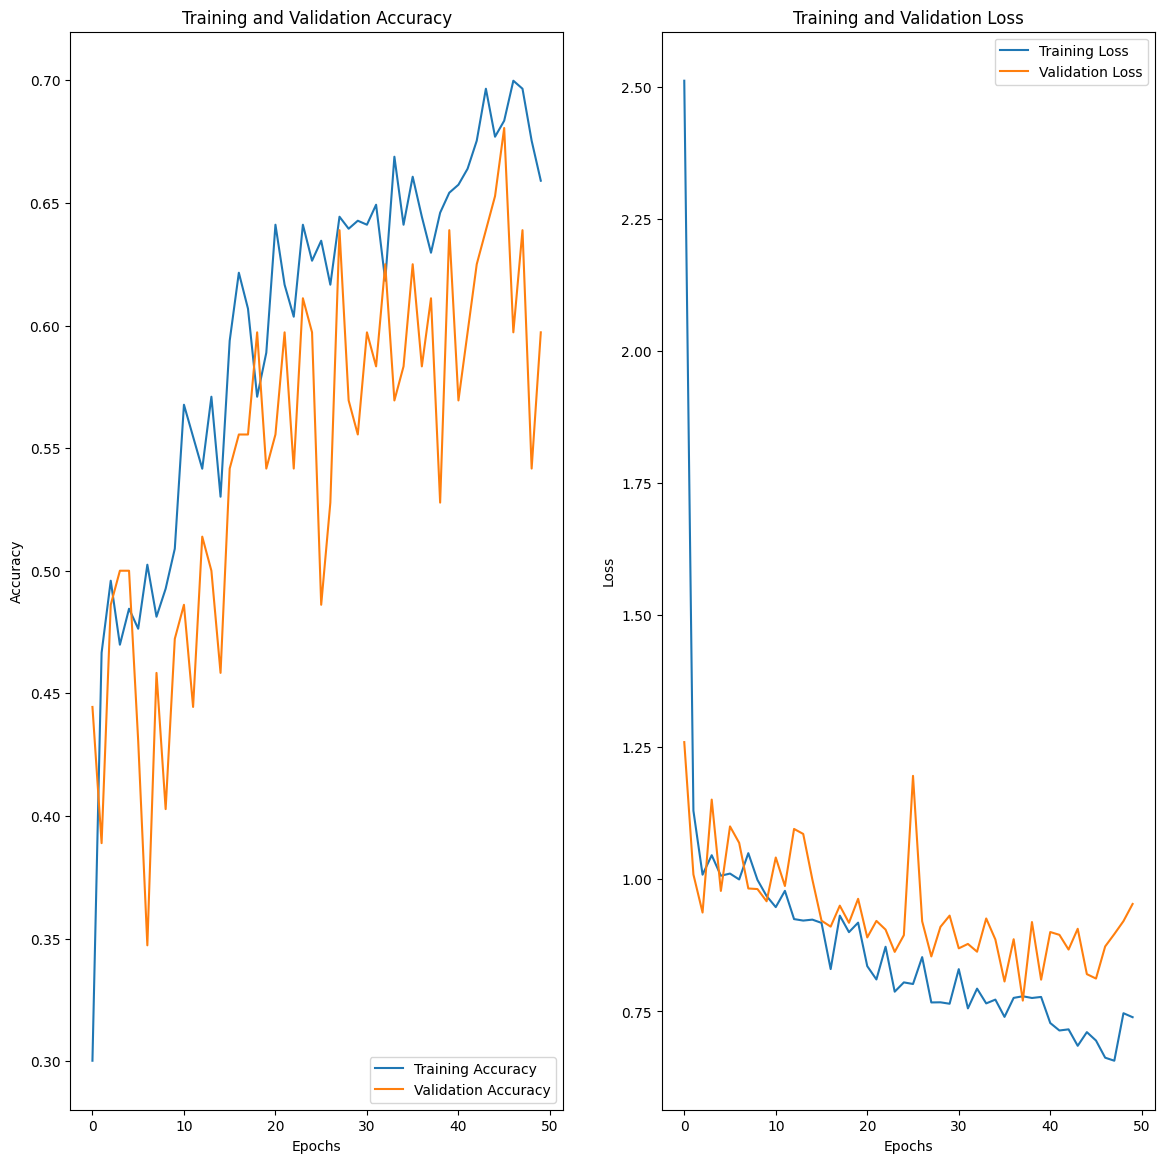

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

In [ ]:
# Model Zefnet with 100 epoch
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model1 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model1.build(input_shape=input_shape)


In [ ]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model1.fit(
    train_ds,
    epochs=100,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 100

Epoch 1/100
20/20 [==============================] - 6s 108ms/step - loss: 1.3995 - accuracy: 0.3393 - val_loss: 1.1132 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 2s 85ms/step - loss: 1.2441 - accuracy: 0.4519 - val_loss: 1.1049 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 2s 83ms/step - loss: 1.0724 - accuracy: 0.5041 - val_loss: 1.0228 - val_accuracy: 0.4583
Epoch 4/100
20/20 [==============================] - 2s 85ms/step - loss: 0.9765 - accuracy: 0.5090 - val_loss: 0.9701 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 2s 84ms/step - loss: 0.9734 - accuracy: 0.4959 - val_loss: 0.9570 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 2s 84ms/step - loss: 1.0323 - accuracy: 0.5073 - val_loss: 1.0155 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 2s 88ms/step - loss: 0.9692 - accuracy: 0.5432 - val_loss: 1.0019 - val_accuracy: 0.5139
Epoch

In [ ]:
scores = model1.evaluate(val_ds)

3/3 [==============================] - 0s 17ms/step - loss: 0.8391 - accuracy: 0.6806


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

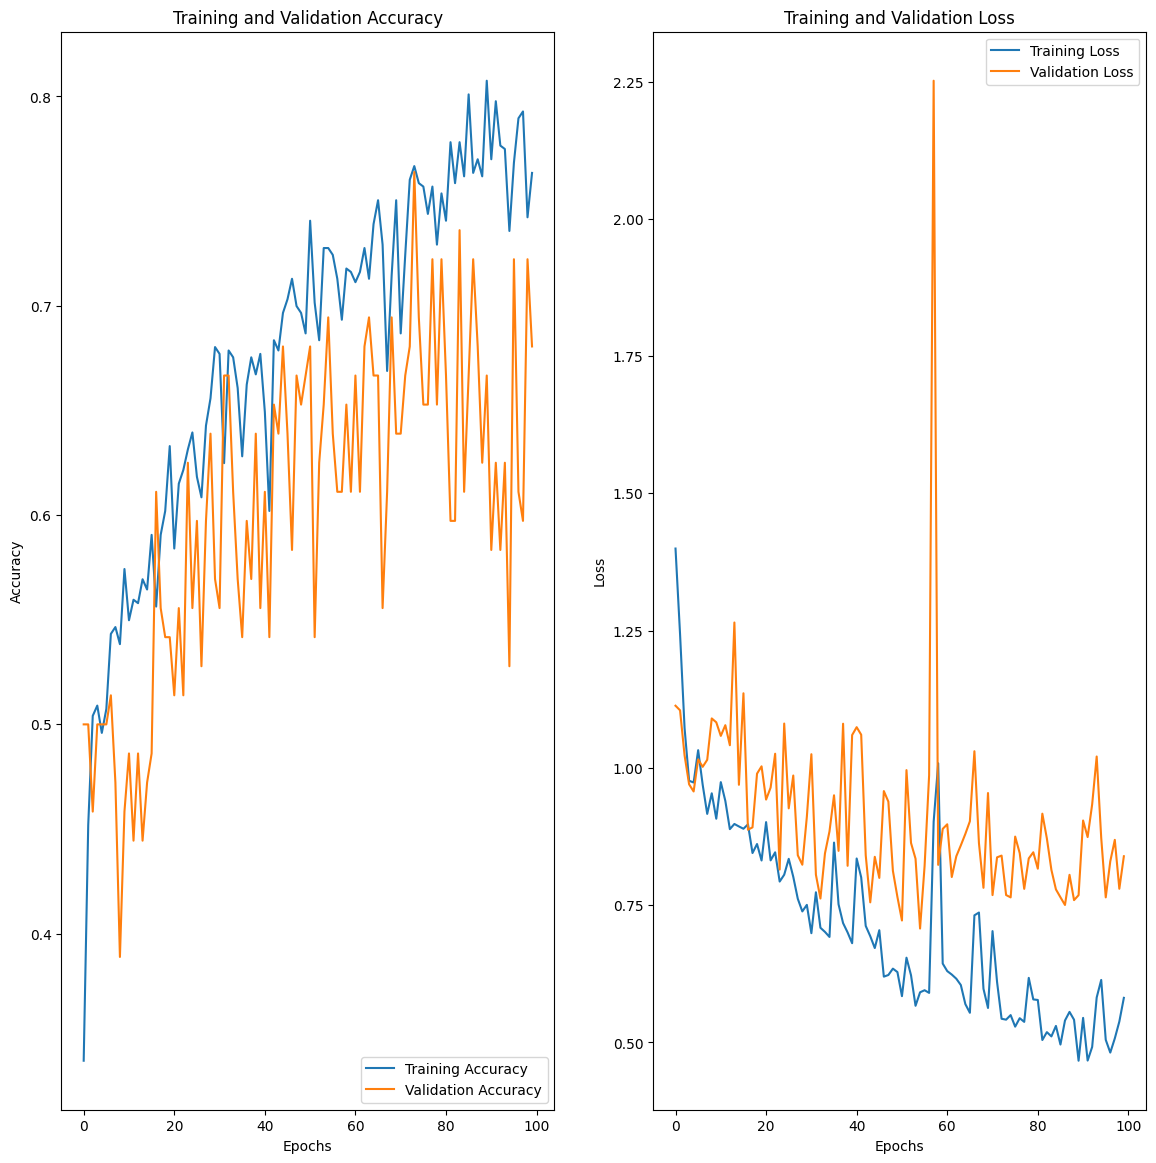

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

In [ ]:
# Model Zefnet with 200 epoch
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model2 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model2.build(input_shape=input_shape)


In [ ]:
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model2.fit(
    train_ds,
    epochs=200,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 200

Epoch 1/200
20/20 [==============================] - 5s 105ms/step - loss: 1.5241 - accuracy: 0.3148 - val_loss: 1.3468 - val_accuracy: 0.3194
Epoch 2/200
20/20 [==============================] - 2s 86ms/step - loss: 1.2986 - accuracy: 0.3719 - val_loss: 1.1441 - val_accuracy: 0.4444
Epoch 3/200
20/20 [==============================] - 2s 83ms/step - loss: 1.1500 - accuracy: 0.4502 - val_loss: 1.0034 - val_accuracy: 0.4861
Epoch 4/200
20/20 [==============================] - 2s 83ms/step - loss: 1.0082 - accuracy: 0.4894 - val_loss: 0.9702 - val_accuracy: 0.4861
Epoch 5/200
20/20 [==============================] - 2s 84ms/step - loss: 1.1069 - accuracy: 0.5122 - val_loss: 1.0221 - val_accuracy: 0.3750
Epoch 6/200
20/20 [==============================] - 2s 84ms/step - loss: 1.0426 - accuracy: 0.4535 - val_loss: 0.9596 - val_accuracy: 0.3889
Epoch 7/200
20/20 [==============================] - 2s 86ms/step - loss: 0.9923 - accuracy: 0.5041 - val_loss: 0.9345 - val_accuracy: 0.5000
Epoch

In [ ]:
scores = model2.evaluate(val_ds)

3/3 [==============================] - 0s 16ms/step - loss: 0.8564 - accuracy: 0.6944


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

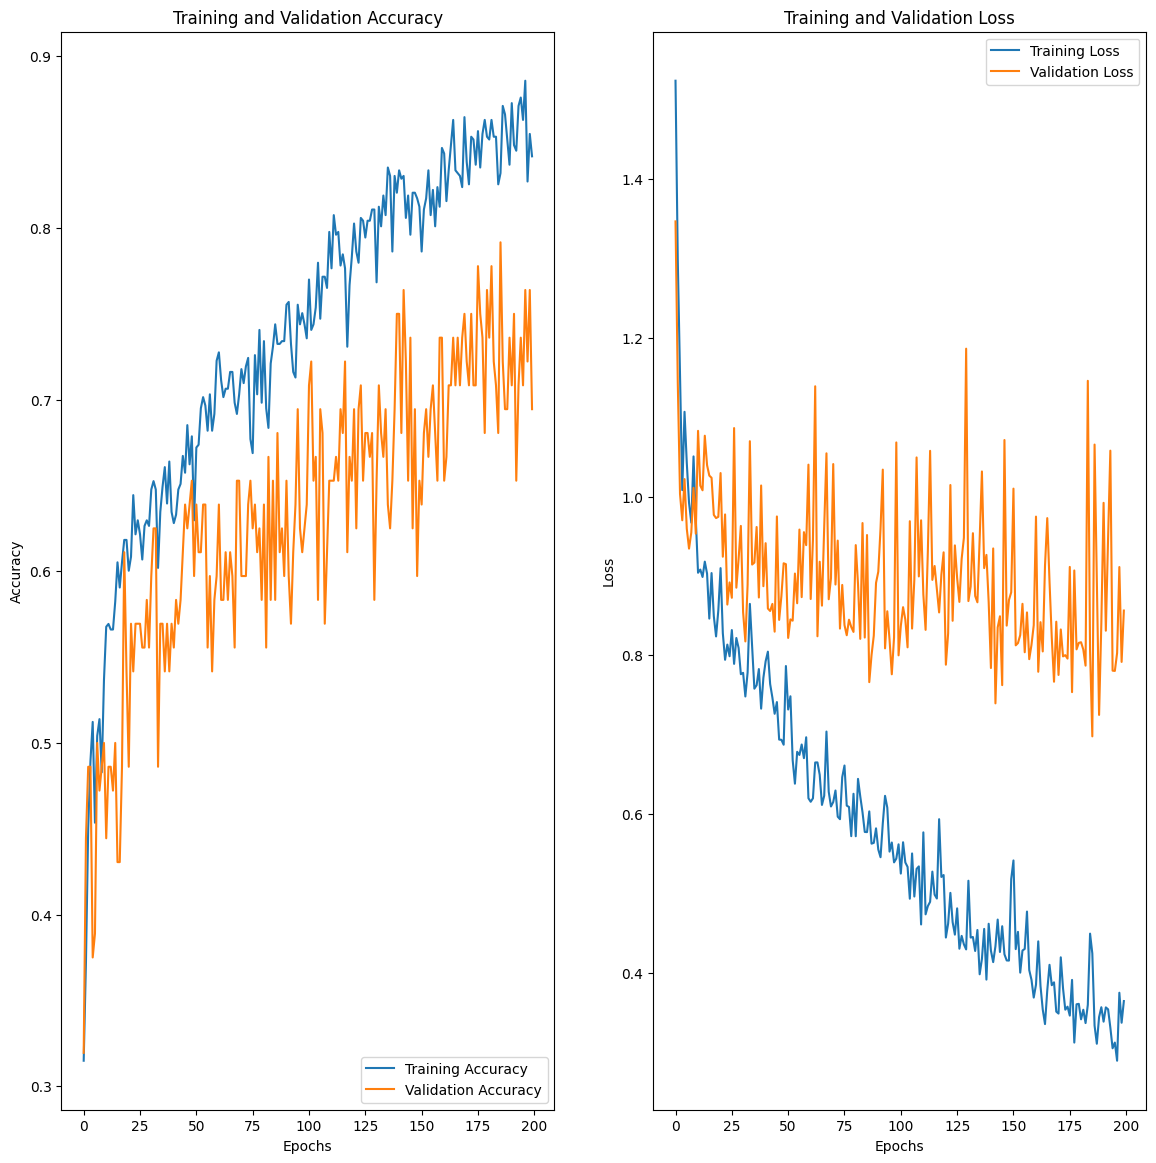

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

In [ ]:
# Model Zefnet with 300 epoch
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model3 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model3.build(input_shape=input_shape)


In [ ]:
model3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model3.fit(
    train_ds,
    epochs=300,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 300

Epoch 1/300
20/20 [==============================] - 6s 98ms/step - loss: 1.3842 - accuracy: 0.3312 - val_loss: 1.1611 - val_accuracy: 0.4861
Epoch 2/300
20/20 [==============================] - 2s 91ms/step - loss: 1.1308 - accuracy: 0.4486 - val_loss: 1.0579 - val_accuracy: 0.4583
Epoch 3/300
20/20 [==============================] - 2s 85ms/step - loss: 1.0387 - accuracy: 0.5122 - val_loss: 1.0427 - val_accuracy: 0.3472
Epoch 4/300
20/20 [==============================] - 2s 86ms/step - loss: 1.0375 - accuracy: 0.4649 - val_loss: 0.9603 - val_accuracy: 0.5000
Epoch 5/300
20/20 [==============================] - 2s 88ms/step - loss: 0.9780 - accuracy: 0.5171 - val_loss: 0.9735 - val_accuracy: 0.4306
Epoch 6/300
20/20 [==============================] - 2s 87ms/step - loss: 1.0013 - accuracy: 0.5024 - val_loss: 0.9632 - val_accuracy: 0.4444
Epoch 7/300
20/20 [==============================] - 2s 85ms/step - loss: 1.0325 - accuracy: 0.5122 - val_loss: 0.9616 - val_accuracy: 0.4444
Epoch 

In [ ]:
scores = model3.evaluate(val_ds)

3/3 [==============================] - 0s 17ms/step - loss: 0.9858 - accuracy: 0.7639


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

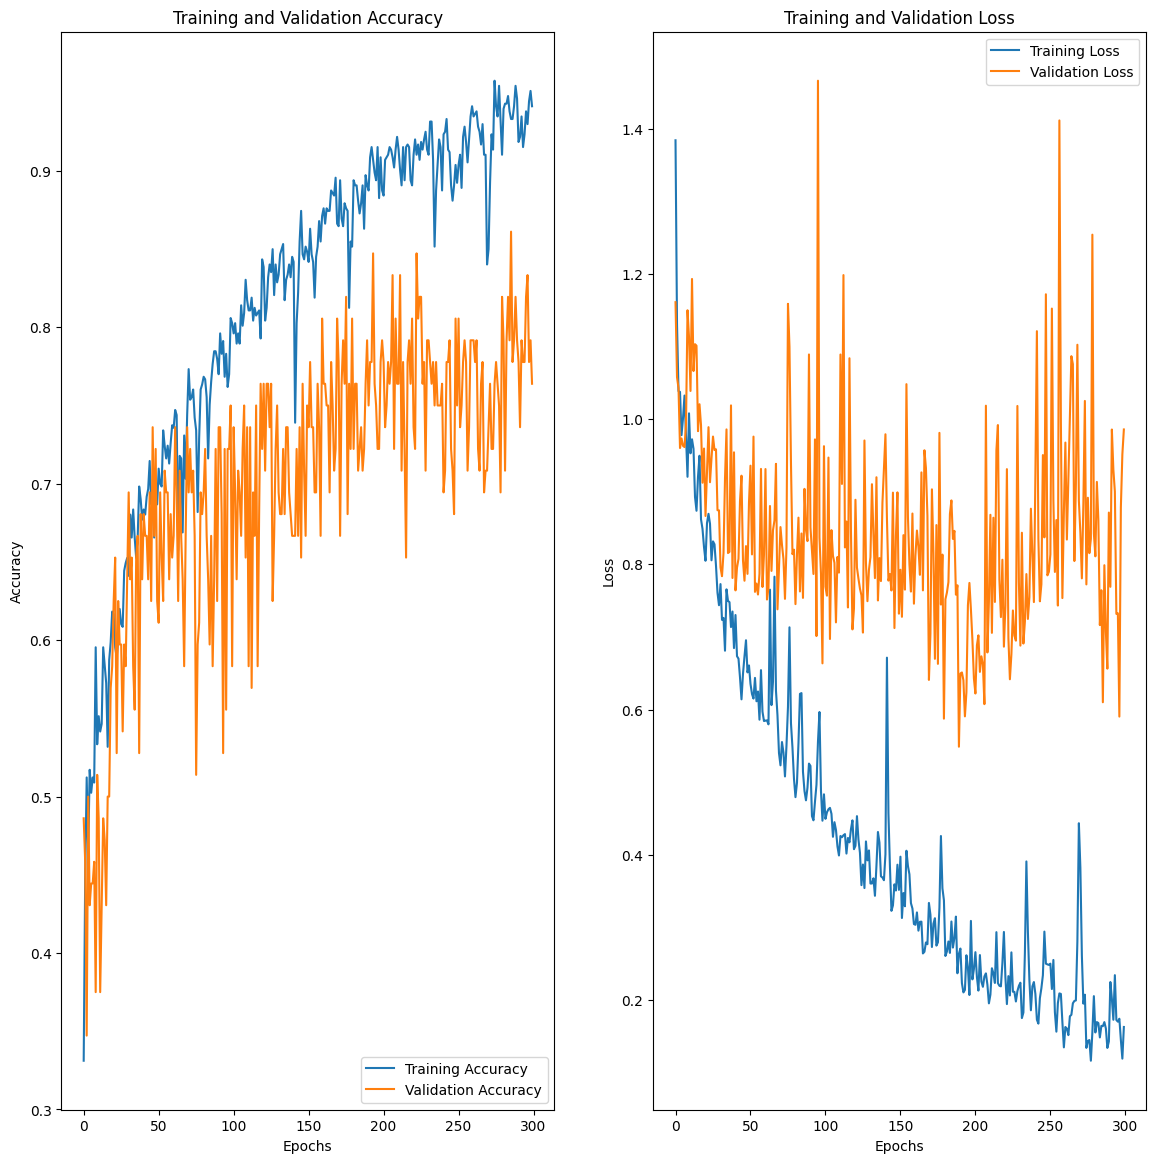

In [ ]:
plt.figure(figsize=(14,14))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

In [ ]:
scores = model3.evaluate(train_ds)
scores = model3.evaluate(val_ds)

3/3 [==============================] - 0s 17ms/step - loss: 0.9858 - accuracy: 0.7639


In [ ]:
scores = model.evaluate(train_ds)
scores = model.evaluate(val_ds)

3/3 [==============================] - 0s 22ms/step - loss: 0.9535 - accuracy: 0.5972


In [ ]:
scores = model2.evaluate(train_ds)
scores = model2.evaluate(val_ds)

3/3 [==============================] - 0s 17ms/step - loss: 0.8564 - accuracy: 0.6944


In [ ]:
scores = model1.evaluate(train_ds)
scores = model1.evaluate(val_ds)

3/3 [==============================] - 0s 21ms/step - loss: 0.8391 - accuracy: 0.6806


In [9]:
# Model Zefnet
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model4 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model4.build(input_shape=input_shape)


In [10]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 1)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 conv2d (Conv2D)             (32, 125, 125, 96)        4800      
                                                                 
 max_pooling2d (MaxPooling2  (32, 62, 62, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 31, 31, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 15, 15, 256)         0         
 g2D)                                                 

In [11]:
model4.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
history = model4.fit(
    train_ds,
    epochs=400,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 400

Epoch 1/400
20/20 [==============================] - 170s 1s/step - loss: 1.4942 - accuracy: 0.3295 - val_loss: 1.1132 - val_accuracy: 0.4583
Epoch 2/400
20/20 [==============================] - 2s 94ms/step - loss: 1.2942 - accuracy: 0.3915 - val_loss: 1.3359 - val_accuracy: 0.3194
Epoch 3/400
20/20 [==============================] - 2s 87ms/step - loss: 1.2875 - accuracy: 0.3850 - val_loss: 1.1657 - val_accuracy: 0.3472
Epoch 4/400
20/20 [==============================] - 2s 83ms/step - loss: 1.1111 - accuracy: 0.4584 - val_loss: 1.0432 - val_accuracy: 0.4722
Epoch 5/400
20/20 [==============================] - 2s 83ms/step - loss: 0.9685 - accuracy: 0.5041 - val_loss: 0.9274 - val_accuracy: 0.5000
Epoch 6/400
20/20 [==============================] - 2s 84ms/step - loss: 0.9534 - accuracy: 0.5400 - val_loss: 0.9656 - val_accuracy: 0.4167
Epoch 7/400
20/20 [==============================] - 2s 84ms/step - loss: 0.9765 - accuracy: 0.5465 - val_loss: 1.1184 - val_accuracy: 0.3472
Epoch 

In [14]:
scores = model4.evaluate(val_ds)

3/3 [==============================] - 0s 32ms/step - loss: 0.5421 - accuracy: 0.8611


In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

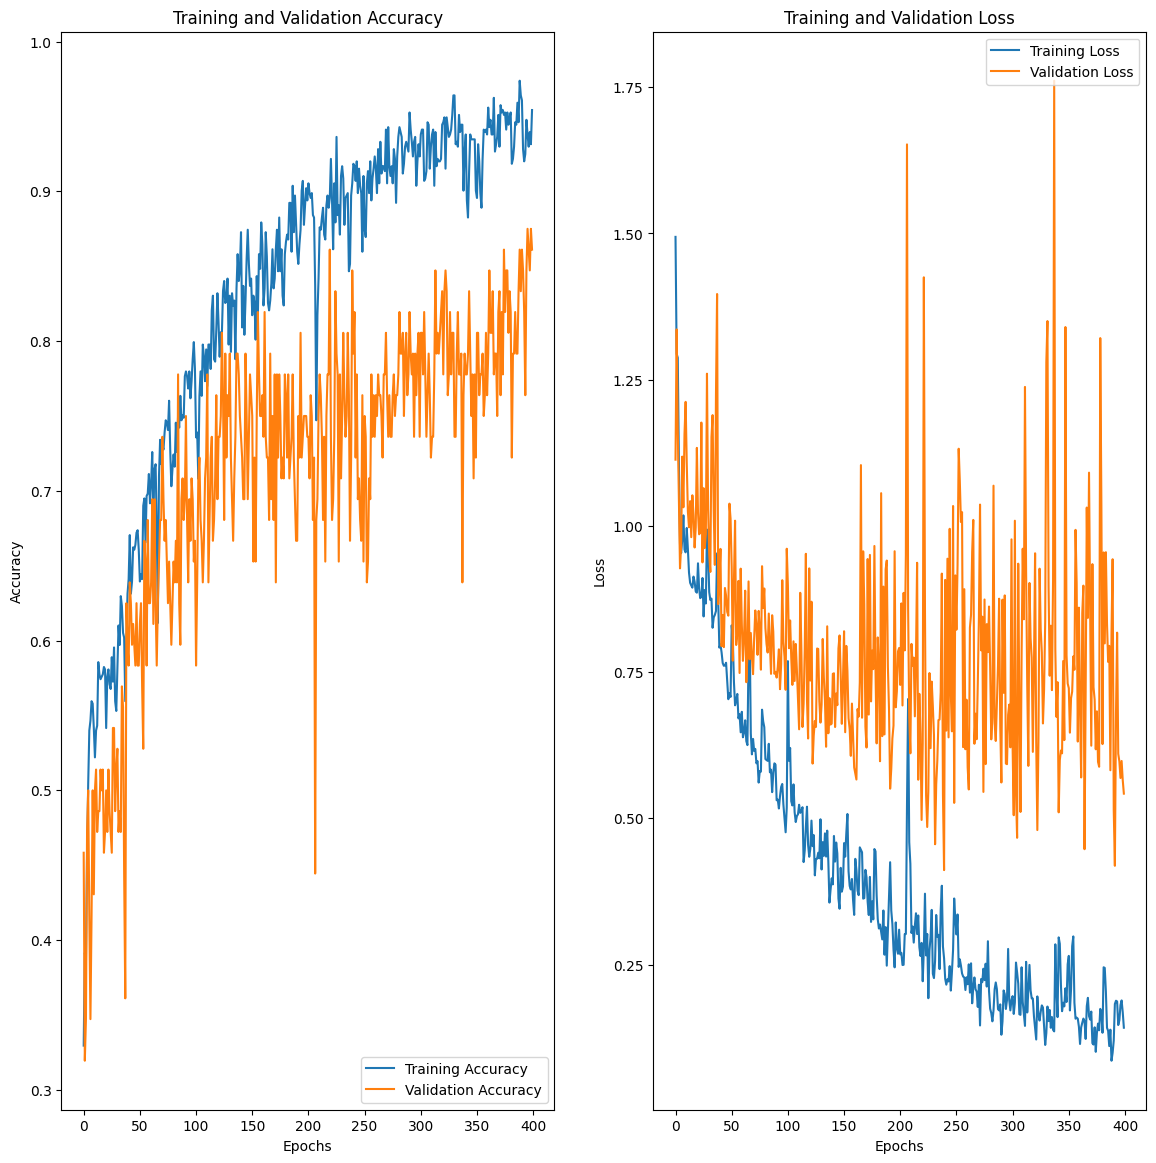

In [16]:
plt.figure(figsize=(14,14))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

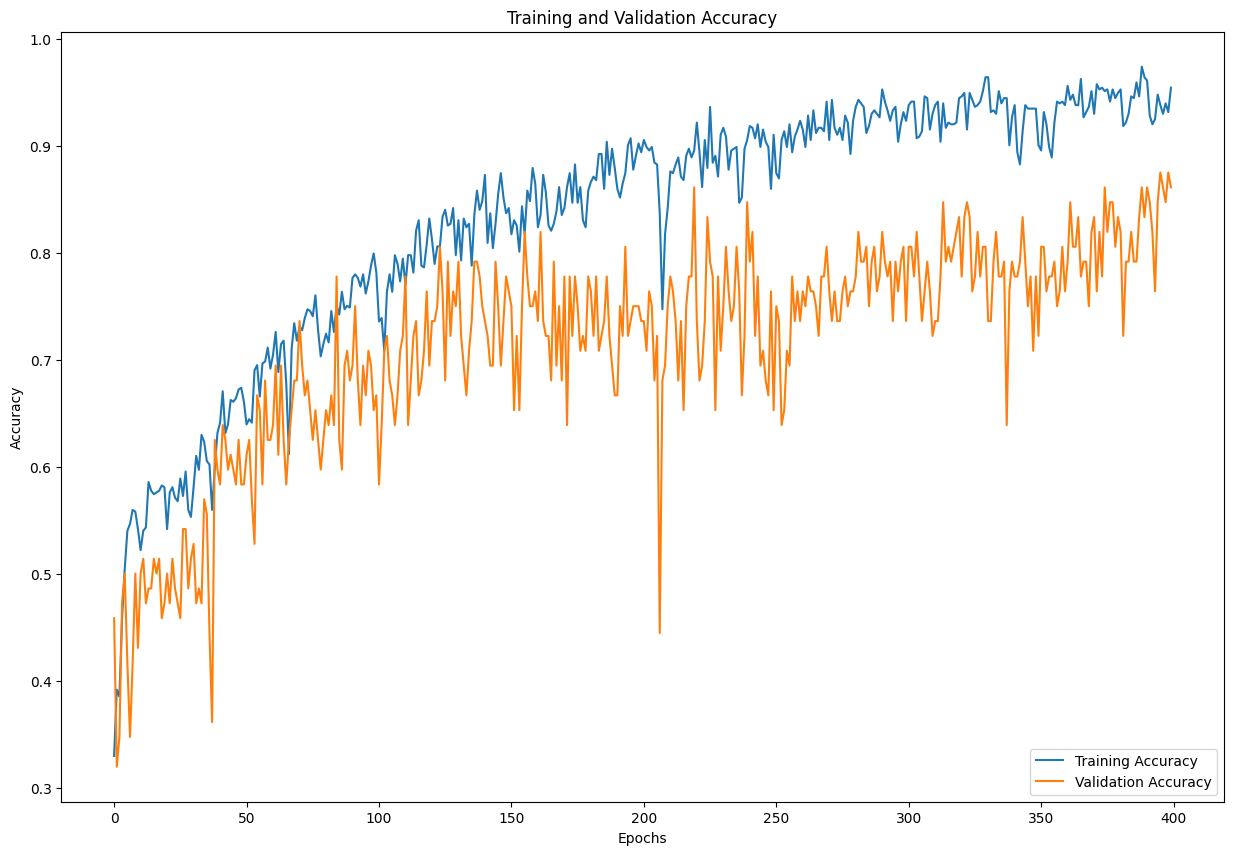

In [19]:
plt.figure(figsize=(15,10))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

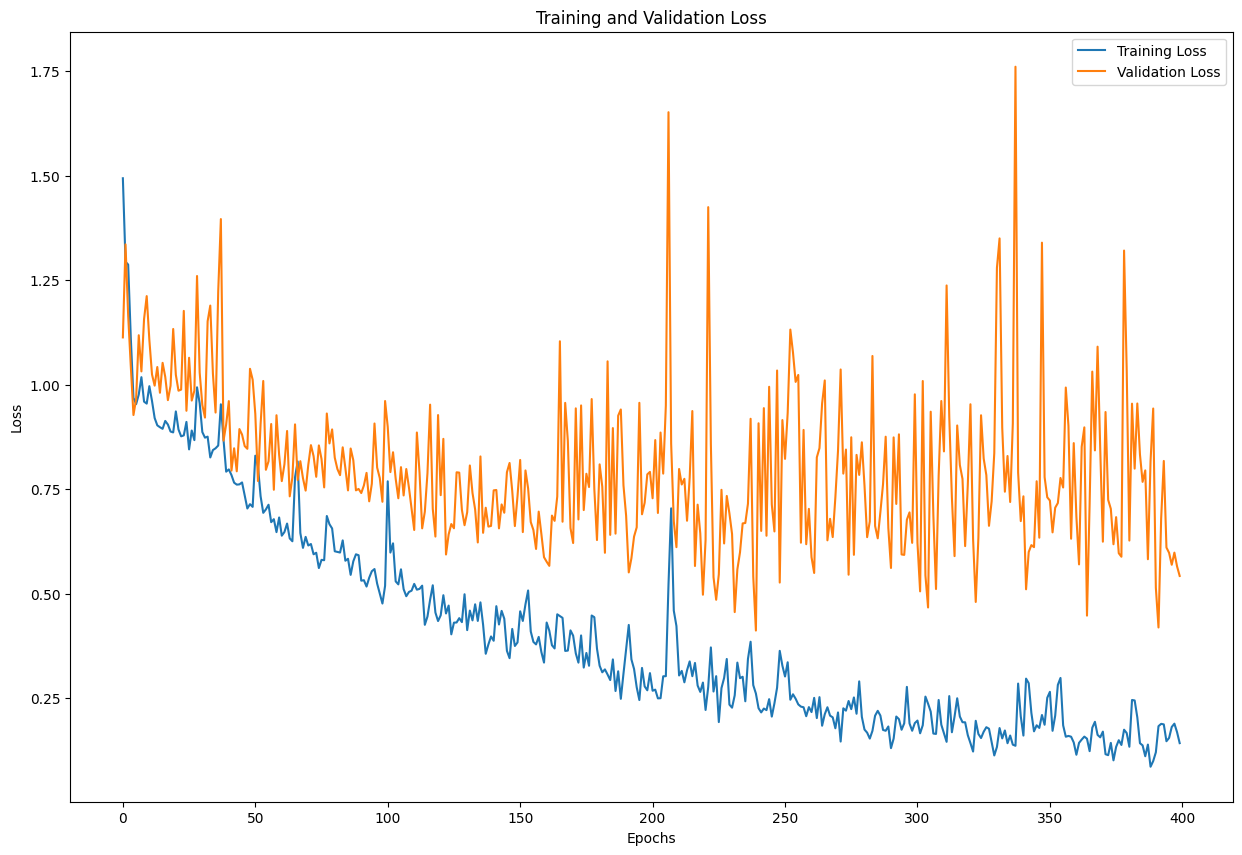

In [20]:
plt.figure(figsize=(15,10))

plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
# Model Zefnet
from tensorflow.keras import layers, models

# Define input shape and number of classes
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

# Define ZFNet model
model5 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model
model5.build(input_shape=input_shape)


In [22]:
model5.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model5.fit(
    train_ds,
    epochs=500,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
EPOCH = epochs = 500

Epoch 1/500
20/20 [==============================] - 6s 100ms/step - loss: 1.9025 - accuracy: 0.3034 - val_loss: 1.1983 - val_accuracy: 0.4722
Epoch 2/500
20/20 [==============================] - 2s 86ms/step - loss: 1.0626 - accuracy: 0.4731 - val_loss: 1.0043 - val_accuracy: 0.4722
Epoch 3/500
20/20 [==============================] - 2s 88ms/step - loss: 1.0611 - accuracy: 0.4894 - val_loss: 1.1839 - val_accuracy: 0.3889
Epoch 4/500
20/20 [==============================] - 2s 105ms/step - loss: 1.0949 - accuracy: 0.4682 - val_loss: 1.1111 - val_accuracy: 0.4722
Epoch 5/500
20/20 [==============================] - 2s 97ms/step - loss: 0.9621 - accuracy: 0.5155 - val_loss: 0.9624 - val_accuracy: 0.4167
Epoch 6/500
20/20 [==============================] - 2s 86ms/step - loss: 0.9365 - accuracy: 0.5628 - val_loss: 0.9611 - val_accuracy: 0.4722
Epoch 7/500
20/20 [==============================] - 2s 88ms/step - loss: 0.9329 - accuracy: 0.5693 - val_loss: 1.0134 - val_accuracy: 0.4861
Epoc

In [24]:
scores = model5.evaluate(val_ds)

3/3 [==============================] - 0s 18ms/step - loss: 0.6816 - accuracy: 0.8194


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

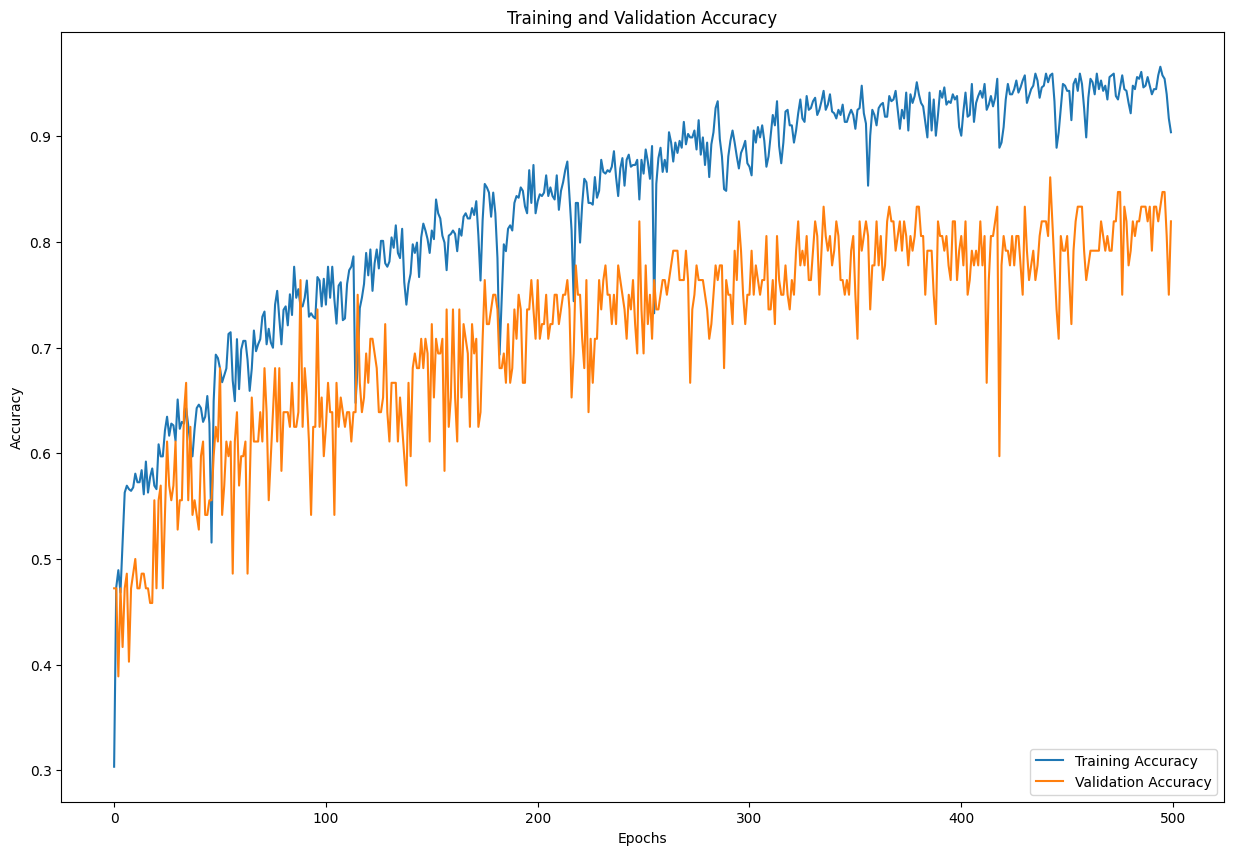

In [26]:
plt.figure(figsize=(15,10))


plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.show()

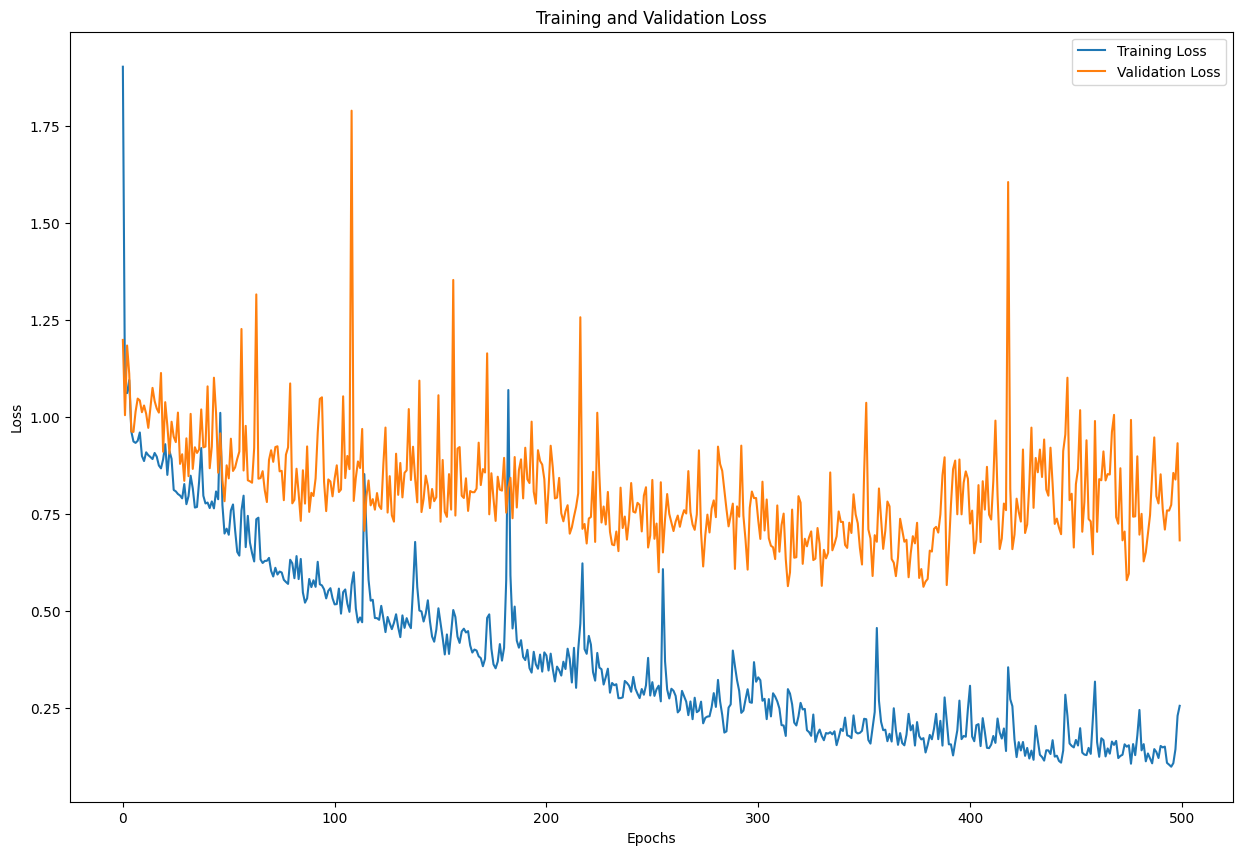

In [27]:
plt.figure(figsize=(15,10))

plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()